In [80]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize

Dades amb el data augmented. S'han agafat totes les metriques d'una arquitectura multilayer

In [81]:
clinic=pd.read_csv('clinic.csv')
X1 = pd.read_csv('3_l_3_c_datav2_all.csv')
X2 = pd.read_csv('3_l_3_c_datav2_aug_all.csv')
X = pd.concat([X1, X2],ignore_index=True)
y1 = pd.read_csv('groups.csv')
y2 = pd.read_csv('groups.csv')
y = pd.concat([y1, y2],ignore_index=True)
y=y['mstype']
#X['sex']=pd.concat(clinic['sex'],clinic['sex'])
#X['age']=pd.concat(clinic['age'],clinic['age'])
for i in range(len(y)):
    if y[i]==2:
        y[i]=1
X = X.drop(columns=['Unnamed: 0','<built-in function id>'])
y+=1        
y=y.to_numpy()

In [82]:
sex=clinic['sex'].to_numpy()
np.copy(sex)
sex_of=np.concatenate((sex,sex))
X['sex']=sex_of
age=clinic['age'].to_numpy()
np.copy(age)
age_of=np.concatenate((age,age))
X['age']=age_of


PCA per reduir dimensionalitat. 

In [83]:
pca = PCA(150)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
X = projected
X=normalize(X)
'''
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
'''

"\nplt.scatter(projected[:, 0], projected[:, 1],\n            c=y, edgecolor='none', alpha=0.5)\nplt.xlabel('component 1')\nplt.ylabel('component 2')\nplt.colorbar();\n"

In [84]:
from sklearn.decomposition import FactorAnalysis


Es divideixen les dades en el grup de (Train + Validation) i el de test (20%).

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify = y, random_state=42)


Execucions del model XGBC amb cross validation

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.95      0.88      0.92        43
           2       0.71      1.00      0.83         5

    accuracy                           0.87        53
   macro avg       0.72      0.83      0.76        53
weighted avg       0.89      0.87      0.87        53



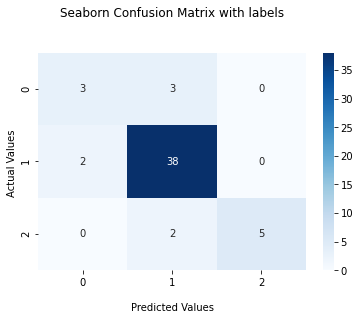

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.97      0.90      0.94        41
           2       0.60      1.00      0.75         6

    accuracy                           0.91        53
   macro avg       0.86      0.91      0.87        53
weighted avg       0.93      0.91      0.91        53



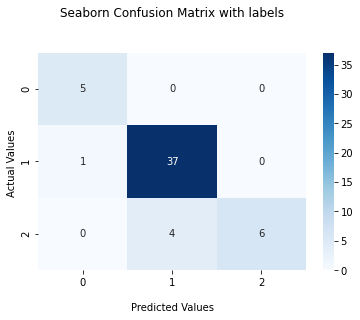

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.96        43
           2       0.71      1.00      0.83         5

    accuracy                           0.94        53
   macro avg       0.85      0.98      0.90        53
weighted avg       0.96      0.94      0.95        53



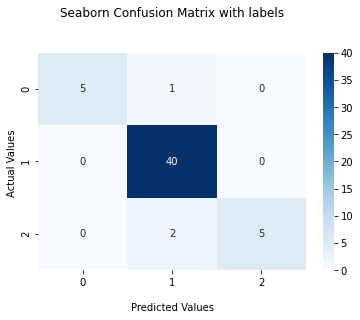

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.96      0.98        45
           2       0.83      1.00      0.91         5

    accuracy                           0.96        53
   macro avg       0.86      0.99      0.91        53
weighted avg       0.97      0.96      0.96        53



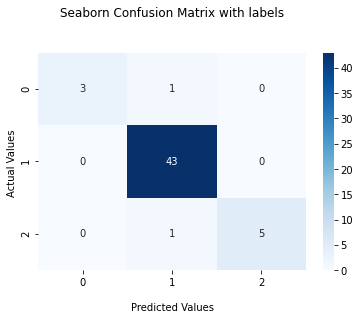

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.95      0.97        41
           2       1.00      1.00      1.00         5

    accuracy                           0.96        52
   macro avg       0.92      0.98      0.94        52
weighted avg       0.97      0.96      0.96        52



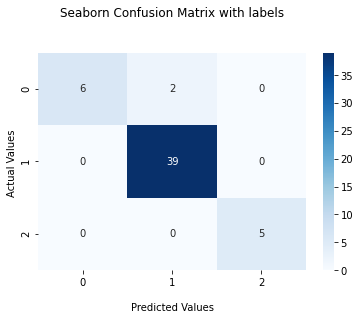

In [86]:
import xgboost as xgb
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models = []
scores = []


for train_index, val_index in kfold.split(X_train):   
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    xgb_model = xgb.XGBClassifier(learning_rate=0.15,objective="multi:softprob", random_state=42)
    xgb_model.fit(X_train_fold, y_train_fold)
    
    y_pred = xgb_model.predict(X_val_fold)
    
    print(classification_report(y_pred,y_val_fold))
    models.append(xgb_model)
    cf_matrix=confusion_matrix(y_val_fold,y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    






El millor model es el de la 5a execució

In [87]:
'''
k=False
for train_index, val_index  in kfold.split(X_train):
    if k==False:
        k=True
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
xgb_model=models[0]
y_pred = xgb_model.predict(X_val_fold)
    
print(accuracy_score(y_pred,y_val_fold))
cf_matrix=confusion_matrix(y_val_fold,y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
'''

"\nk=False\nfor train_index, val_index  in kfold.split(X_train):\n    if k==False:\n        k=True\n        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]\n        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]\nxgb_model=models[0]\ny_pred = xgb_model.predict(X_val_fold)\n    \nprint(accuracy_score(y_pred,y_val_fold))\ncf_matrix=confusion_matrix(y_val_fold,y_pred)\n\nax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')\n\nax.set_title('Seaborn Confusion Matrix with labels\n\n');\nax.set_xlabel('\nPredicted Values')\nax.set_ylabel('Actual Values ');\n\n## Display the visualization of the Confusion Matrix.\nplt.show()\n"

# Test

Executem el test al millor model

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.94      0.97        53
           2       0.78      1.00      0.88         7

    accuracy                           0.95        66
   macro avg       0.88      0.98      0.92        66
weighted avg       0.96      0.95      0.96        66



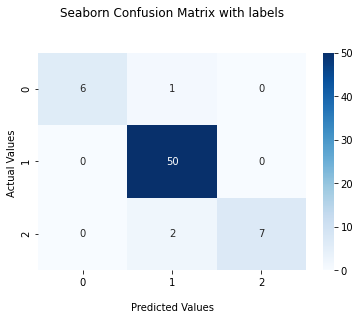

In [88]:
xgb_model=models[4]
y_pred = xgb_model.predict(X_test)
    
print(classification_report(y_pred,y_test))

cf_matrix=confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Classe 0 = Sans
# Classe 1 = RRMS
# Classe 2 = PPMS+SPMS
Els resultats semblen tenir ja una mica de sentit. Caldrien metriques per comparar amb altres models. Accuracy no es el més adequat d'utilitzar perque les classes estan molt desbalancejades.